# Explore here

In [80]:
# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

In [81]:
df = pd.read_csv("../data/raw/playstore_reviews.csv")
df

,package_name,review,polarity
0,com.facebook.katana,privacy at least put some option appear offli...,0
1,com.facebook.katana,"messenger issues ever since the last update, ...",0
2,com.facebook.katana,profile any time my wife or anybody has more ...,0
3,com.facebook.katana,the new features suck for those of us who don...,0
4,com.facebook.katana,forced reload on uploading pic on replying co...,0
...,...,...,...
886,com.rovio.angrybirds,loved it i loooooooooooooovvved it because it...,1
887,com.rovio.angrybirds,all time legendary game the birthday party le...,1
888,com.rovio.angrybirds,ads are way to heavy listen to the bad review...,0
889,com.rovio.angrybirds,fun works perfectly well. ads aren't as annoy...,1


In [82]:
#borramos la columna de package_name porque como dice el enunciado ,no nos sirve para nada
# ya que las dos columnas que utlizaremos para losresultados son review para el comentario
#y polarity para saber si es positivo o negativo
df = df.drop('package_name', axis=1)

In [83]:
df

,review,polarity
0,privacy at least put some option appear offli...,0
1,"messenger issues ever since the last update, ...",0
2,profile any time my wife or anybody has more ...,0
3,the new features suck for those of us who don...,0
4,forced reload on uploading pic on replying co...,0
...,...,...
886,loved it i loooooooooooooovvved it because it...,1
887,all time legendary game the birthday party le...,1
888,ads are way to heavy listen to the bad review...,0
889,fun works perfectly well. ads aren't as annoy...,1


In [84]:
#elimianmos espacios y convertimos a minúsculas el texto 
df["review"] = df["review"].str.strip().str.lower()

In [85]:
#dividimos los datos en conjuntos de entrenamiento y testeo
X = df['review']
y = df['polarity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
X_train.shape

(712,)

In [87]:
X_test.shape

(179,)

In [88]:
vectorizer = CountVectorizer(stop_words = "english")
X_train_vec = vectorizer.fit_transform(X_train).toarray()
X_test_vec = vectorizer.transform(X_test).toarray()

In [89]:
vectorizer.get_feature_names_out()

array(['000', '04', '0x', ..., 'žŕ', 'žŕľ', 'ˇŕ'],
      shape=(3310,), dtype=object)

In [90]:
X_test_vec

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(179, 3310))

In [91]:
X_test

709    love/hate has bug and security issues. i tried...
439    whatsapp i use this app now that blackberry me...
840                             usefully verry  nice app
720    fonts why in the heck is this thing analysing ...
39     app doesn't work after latest upgrade the face...
                             ...                        
433    app continuously losses connection, at times i...
773    way below expection. why does it lag so much? ...
25     can't install (error code: -505) have samsung ...
84     sort it out why can i not get my networks post...
10     what the heck?! can't get status updates to be...
Name: review, Length: 179, dtype: object

In [92]:
#elegimos el clasificador Multinomial porque lo que se analiza es un comentario
# y según sus palabras se identiica si es negativo o positivo
clf = MultinomialNB().fit(X_train_vec, y_train)
y_pred = clf.predict(X_test_vec)
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.8156
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       126
           1       0.73      0.60      0.66        53

    accuracy                           0.82       179
   macro avg       0.79      0.75      0.77       179
weighted avg       0.81      0.82      0.81       179



In [93]:
#ahora lo probamos con GaussianNB
model = GaussianNB().fit(X_train_vec,y_train)
y_pred_gaus = model.predict(X_test_vec)
print(f'Accuracy: {accuracy_score(y_test, y_pred_gaus):.4f}')
print(classification_report(y_test, y_pred_gaus))

Accuracy: 0.8045
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       126
           1       0.69      0.62      0.65        53

    accuracy                           0.80       179
   macro avg       0.77      0.75      0.76       179
weighted avg       0.80      0.80      0.80       179



In [94]:
#ahora lo probamos con Bernoulli
clf_bernoulli = BernoulliNB().fit(X_train_vec, y_train)
y_pred_bern = clf_bernoulli.predict(X_test_vec)
print(f'Accuracy: {accuracy_score(y_test, y_pred_bern):.4f}')
print(classification_report(y_test, y_pred_bern))

Accuracy: 0.7709
              precision    recall  f1-score   support

           0       0.79      0.93      0.85       126
           1       0.70      0.40      0.51        53

    accuracy                           0.77       179
   macro avg       0.74      0.66      0.68       179
weighted avg       0.76      0.77      0.75       179



# Nos quedamos con el clasificador MultinomialNB porque tiene el mejor accuracy de los tres

# Optimizamos los resultados con un random forest

In [95]:
model_random = RandomForestClassifier(random_state = 42)
model_random.fit(X_train_vec, y_train)

FileNotFoundError: [Errno 2] No such file or directory: '/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/_repr_html/estimator.js'

FileNotFoundError: [Errno 2] No such file or directory: '/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/_repr_html/estimator.js'

RandomForestClassifier(random_state=42)

In [96]:
y_pred_random = model_random.predict(X_test_vec)
y_pred_random

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0])

In [97]:
print(f'Accuracy: {accuracy_score(y_test, y_pred_random)}')
print(classification_report(y_test, y_pred_random))

Accuracy: 0.7988826815642458
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       126
           1       0.64      0.74      0.68        53

    accuracy                           0.80       179
   macro avg       0.76      0.78      0.77       179
weighted avg       0.81      0.80      0.80       179



In [98]:
#vamos a graficar los resultados
acc_multi = accuracy_score(y_test, y_pred)
acc_gaus = accuracy_score(y_test, y_pred_gaus)
acc_bern = accuracy_score(y_test, y_pred_bern)
acc_random = accuracy_score(y_test, y_pred_random)

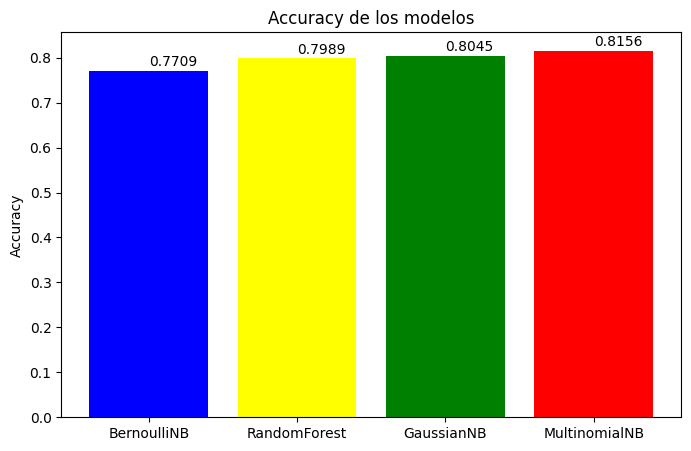

In [99]:
model_names = ['BernoulliNB', 'RandomForest', 'GaussianNB', 'MultinomialNB']
accuracies = [acc_bern, acc_random, acc_gaus, acc_multi]
plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracies, color=['blue', 'yellow', 'green', 'red'])
plt.title('Accuracy de los modelos')
plt.ylabel('Accuracy')
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.4f}')
plt.show()

Tras el estudio de los 4 modelos, elegimos Multinomial porque el accuracy es el mejor

In [100]:
#mejoramos el modelo MultinomialNB probando diferentes valores de alpha
param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]}
grid = GridSearchCV(MultinomialNB(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_vec, y_train)

FileNotFoundError: [Errno 2] No such file or directory: '/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/_repr_html/estimator.js'

FileNotFoundError: [Errno 2] No such file or directory: '/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/_repr_html/estimator.js'

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]},
             scoring='accuracy')

In [101]:
clf_grid = grid.best_estimator_
y_pred_grid = clf_grid.predict(X_test_vec)

In [102]:
print(grid.best_estimator_)

MultinomialNB(alpha=0.5)


In [103]:
print(f'Accuracy: {accuracy_score(y_test, y_pred_grid):.4f}')
print(classification_report(y_test, y_pred_grid))

Accuracy: 0.8268
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       126
           1       0.73      0.66      0.69        53

    accuracy                           0.83       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.82      0.83      0.82       179



In [104]:
print(f'Accuracy MultinomialNB alpha 0.5: {accuracy_score(y_test, y_pred_grid):.4f}')
print(f'Accuracy Multinomial: {accuracy_score(y_test, y_pred):.4f}')

Accuracy MultinomialNB alpha 0.5: 0.8268
Accuracy Multinomial: 0.8156


El modelo Multinomial NB optimizado es el que mejor resultados da:
Con un accuracy de 82.68%, frente al 81.56% del MultinomialNB 

In [ ]:
# Vamos a utilizar Boosting para probar otros modelos
model_xgb = XGBClassifier(random_state =42)
model_xgb.fit(X_train_vec, y_train)

FileNotFoundError: [Errno 2] No such file or directory: '/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/_repr_html/estimator.js'

FileNotFoundError: [Errno 2] No such file or directory: '/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/_repr_html/estimator.js'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [108]:
y_pred_xgb =model_xgb.predict(X_test_vec)
y_pred_xgb

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0])

In [109]:
print(f'Accuracy: {accuracy_score(y_test, y_pred_xgb)}')
print(classification_report(y_test, y_pred_xgb))

Accuracy: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       126
           1       0.68      0.68      0.68        53

    accuracy                           0.81       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.81      0.81      0.81       179



In [112]:
print(f'Accuracy MultinomialNB alpha 0.5: {accuracy_score(y_test, y_pred_grid):.4f}')
print(f'Accuracy XGBoost: {accuracy_score(y_test, y_pred_xgb):.4f}')

Accuracy MultinomialNB alpha 0.5: 0.8268
Accuracy XGBoost: 0.8101


El accuracy de XGBoost no supera al de MultinomialNB alpha 0.5

# El modelo Multinomial NB optimizado es el que mejor resultados da:
# Con un accuracy de 82.68%, frente al 81.56% del MultinomialNB y un 81.01% del XGBoost